# Final project 

### a program that analyzes fieldwork data 

For my final project I create database with my fieldwork materials For Abaza language. 

My fieldwork topic is comparative constructions. In Abaza there is a variability in usage of particles, which are translated as 'more', so as a result I want to draw a visualisation of the spekers' choice of them. 

The choice can depend on many parameters yet for me unknown, for example: type of a predicate, semantic features of an adjective, etc. 

__(Here, in the project, I do not pretend to make any statistical analysis but rather present my datum in more accessible way.)__ 


It contains these primary tables: 
- the sentencial examples, tag and gender of the consultant, and tags by _the_ particles; 
- the examples, tag and gender of the consultant, and tags by predicate type. 


In the tables the negative datum is not presented, thus there would be no lines with `0` in any of the particles columns or reaction. 

In [32]:
from pymystem3 import Mystem
import pandas as pd
import csv
import sqlite3
import requests

First, I create a database with my primary tables: from `particles.csv` and `pedicate_types.csv` to `p_choice.db`. 

In [72]:
# my files 

df_particle = pd.read_csv('particles.csv', sep=';') #, encoding='utf-8') 

df_predicate = pd.read_csv('predicate_types.csv', sep=';')# , encoding='utf-8')

In [73]:
# database creation 

con = sqlite3.connect("p_choice.db") 
cur = con.cursor()

In [87]:
# The tables are the same in many columns. 

df_particle.to_sql(name='particles', con=con, if_exists='replace') 
#print(df_particle.head())

df_predicate.to_sql(name='predicates', con=con, if_exists='replace')
#print(df_predicate.head())

Next, I run few requests to my database. 

In [88]:
# query 1 
# Examples from male speakers. 

cur.execute('SELECT sentence FROM particles WHERE gender = \'m\' ')
print(cur.fetchall())

[('Амир йацк1Ыс БорИс рЫц1а дх1аг1Ап1',), ('ауИ рЫц1а ласЫта дАпхьит1 сАцк1ыс',), ('Мурат сара сшыг1ва ацк1Ыс рЫц1а ласЫта дыдзцит1',), ('ауИ сАцк1ыс рЫц1а ласЫта дАпхьит1',), ('ауИ рах1А ласЫта дАпхьит1 сАцк1ыс',), ('ауИ рах1А ласЫта дАпхьит1 сАцк1ыс',), ('ауИ сАцк1ыс рах1А ласЫта дАпхьит1',), ('ауИ сарА сышг1вА Ацк1ыс рах1А ласЫта дАпхьит1',), ('ауИ сарА сышг1вА (с)ацк1Ыс рах1А ласЫта дАпхьит1',), ('ауИ даннЫкъвауа ацк1Ыс данЫг1вуа рах1А йайх1Ап1',), ('ЛИна рЫц1а дгвыбзЫгъап1 сшхъвыцуАз ацк1ыс',), ('амш рЫц1а йауырАп1 сшхъвыцуАз ацк1Ыс',), ('ахатшпЫ рЫц1а йц1Олап1 дышхъвЫцуа ацк1Ыс',), ('СултАн йытдзЫ рЫц1а йдуп1 Мух1амАд йбОра ацк1Ыс',), ('СултАн йтып атдзЫ рЫц1а йапшп1 Мух1амАд йбОра ацк1Ыс',), ('ауИ ласЫта рЫц1а дАпхьит1 сацк1Ыс',), ('ауИ ласЫта дАпхьит1 рЫц1а сацк1Ыс',), ('ауИ ласЫта дАпхьит1 сацк1Ыс рЫц1а',), ('ауИ рЫц1а сАцк1ыс ласЫта дАпхьит1',), ('ауИ сАцк1ыс ласЫта рЫц1а дАпхьит1',), ('ауИ сАцк1ыс ласЫта дАпхьит1 рЫц1а',), ('ауИ рЫц1а ласЫ дпхьадзИт1 са сшг1ва Ацк1ыс  ауАса 

In [89]:
# query 2 
# Number of examples with particle rec'a (out of 400) 

# cur.execute('SELECT sentence FROM particles WHERE reca=1')
cur.execute('SELECT COUNT(sentence) FROM particles WHERE reca=1')

print(cur.fetchall())

[(236,)]


In [90]:
# query 3 
# Examples by speaker encoded as '3' 

cur.execute('SELECT sentence FROM predicates WHERE consultant_id = 3')
print(cur.fetchall())

[('ЗарИна хынла рЫц1а ФатИма лацк1Ыс дх1аг1ап1',), ('ЗарИна ФатИма лацк1Ыс рЫц1а хынла дх1аг1ап1',), ('асабИква агвАш рЫц1а пшдза йыршвЫт1',), ('асабИква агвАш рЫц1а пшдза йыршвЫт1  адУква рацк1Ыс',), ('асабИква агвАш рЫц1а пшдза йыршвЫт1 абльЫнква рац1к1Ыс',), ('асабИква агвАш рЫц1а пшдза йыршвЫт1 са сацк1Ыс',), ('асабИква агвАш рЫц1а пшдза йыршвЫт1 ба бацк1Ыс',), ('ауИ сацк1Ыс рах1А ддуп1',), ('МурАт алА ацк1Ыс рах1А ддуп1',), ('ажв рах1А йдуп1 Мурат йацк1Ыс',), ('ажв МурАт йацк1Ыс рах1А йдуп1',), ('ЗарИна г1ванла рах1А ФатИма лАцк1ыс дх1аг1ап1',), ('ЗарИна рах1А г1ванла ФатИма лАцк1ыс дх1аг1ап1',), ('ЗарИна ФатИма лацк1Ыс рах1А хынла дх1аг1ап1',), ('ЗарИна г1ванла ФатИма лацк1Ыс рах1А дх1аг1ап1',), ('арИ Апьхарта рах1А-рах1А бзи йызбауА сАлагат1',), ('арИ Апьхарта рах1А бзи йызбауА сАлагат1',), ('х1пахь йгЫлу Ац1ла ансисквшЫ рах1А-рах1А йАлах1ит1',), ('ФатИма тшы лг1вындзЫкьа Ацк1ыс РуслАн рЫц1а ласЫ дАпхьит1',), ('ауИ рЫц1а ласЫ дЫг1вит1 сарА сАцк1ыс',), ('ауИ рЫц1а ласЫ дЫг1вит1 с

Then I will provide visualizations by some parameters. 

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Proportion of examples')

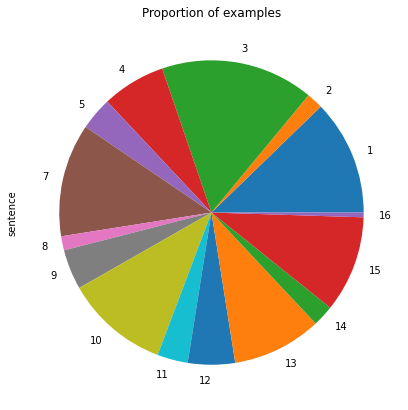

In [96]:
# Illustration of amount of sentences by each speaker. 

df_particle.groupby('consultant_id').sentence.count().plot(figsize=(7,7), kind='pie')
plt.title('Proportion of examples')

On the next chart I present the proportion of _rə́t͡s’a_ 'more' particle used with different typrs of predicates, which are verbs, adj = adjectives, adv = adverbs. The total number of examples in the database is 400, so I calculate proportion as follows: 

$$rə́t͡s’a = \frac{\sum {reca} *{100\%} } {400}$$ 

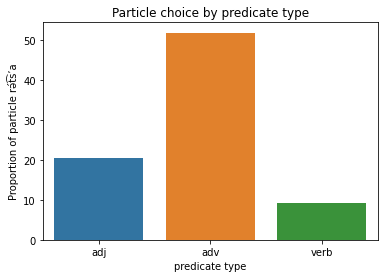

In [183]:
# Here I present distribution of particle choice by predicate type 

(cur.execute('SELECT particles.reca, predicates.parameter_type FROM particles, predicates WHERE particles.sentence = predicates.sentence'))
# df_2 = (cur.execute('SELECT particles.sentence, particles.reca, predicates.sentence, predicates.parameter_type FROM particles, predicates WHERE particles.sentence = predicates.sentence'))
outp = cur.fetchall()
#print(outp) 

f_df = []
for line in outp: 
    l_line = str(line)
    #print(l_line)
    m_line = l_line.replace('(', '')
    n_line = m_line.replace(')', '')
    #print(n_line)
    o_line = n_line.replace("'", "")
    #print(o_line)
    
    p_line = o_line.split(',')
    ll_line = []
    for word in p_line: 
        if word == '1' or word == '0': 
            ll_line.append(int(word))
        #elif word == '0': 
        #    ll_line.append(int(word))
        else: 
            ll_line.append(word)
    #print(ll_line)
    f_df.append(ll_line)
    
#print(f_df)
    
n_adj = 0
n_adv = 0
n_verb = 0 

for elem in f_df:
    #print(elem)
    if elem[1] == ' adj':
        #print(elem[1])
        if elem[0] == 1: 
            n_adj = n_adj + 1 
    elif elem[1] == ' adv': 
        if elem[0] == 1: 
            n_adv = n_adv + 1 
    elif elem[1] == ' verb': 
        if elem[0] == 1: 
            n_verb = n_verb + 1 
            
#print(n_adj)
data = [[(n_adj/4), 'adj'], [(n_adv/4), 'adv'], [(n_verb/4), 'verb']] 

df = pd.DataFrame(data, columns=["reca_percent", "predicate_type"])
df


sns.barplot(x="predicate_type", y="reca_percent", data=df)
plt.title('Particle choice by predicate type')
plt.xlabel('predicate type')
plt.ylabel('Proportion of particle rə́t͡s’a') 

plt.show()

Although these graphs, piechart and barchard, illustrate only part of my parsed data, I can use it further to make visualisations and calculations for the research. 